## Chapter 3. Feature Extraction and Preprocessing

- In this chapter, you will learn basic techniques for preprocessing data and creating feature representations of these observations. 
- These techniques can be used with the regression models discussed in Chapter 2, Linear Regression, as well as the models we will discuss in subsequent chapters.

### 1) Extracting features from categorical variables

- Many machine learning problems have categorical, or nominal, rather than continuous features. 
- Categorical variables are commonly encoded using one-of-K or one-hot encoding, in which the explanatory variable is encoded using one binary feature for each of the variable's possible values.

One-hot encoding represents this explanatory variable using one binary feature for each of the three possible cities (NY, SF, CH).  

In [31]:
# DictVectorizer class can be used to one-hot encode categorical features
from sklearn.feature_extraction import DictVectorizer

In [30]:
onehot_encoder = DictVectorizer()

In [27]:
instances = [
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'},
]

In [28]:
print onehot_encoder.fit_transform(instances).toarray()

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


### 2) Extracting features from text

- Text must be transformed to a different representation that encodes as much of its meaning as possible in a feature vector. 
- In the following sections we will review variations of the most common representation of text that is used in machine learning: the bag-of-words model.

#### The bag-of-words representation

- the bag-of-words does not encode any of the text's syntax, ignores the order of words, and disregards all grammar.
- Bag-of-words can be thought of as an extension to one-hot encoding. 
- It creates one feature for each word of interest in the text. 
- The bag-of-words model is motivated by the intuition that documents containing similar words often have similar meanings. 
- The bag-of-words model can be used effectively for document classification and retrieval despite the limited information that it encodes. 

In [232]:
# corpus(말뭉치) : A collection of documents
corpus = [
       'UNC played Duke in basketball',
       'Duke lost the basketball game'
]

- This corpus contains 8 unique words: UNC, played, Duke, in, basketball, lost, the, and game.
- The number of elements that comprise a feature vector is called the vector's dimension. 
- A dictionary maps the vocabulary to indices in the feature vector.

- CountVectorizer converts the characters in the documents to lowercase, and tokenizes the documents.
- Tokenization is the process of splitting a string into tokens, or meaningful sequences of characters. 

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [1]:
# 문서에 일치하는 단어가 있으면 1, 없으면 0으로 맵핑
print vectorizer.fit_transform(corpus).todense()

NameError: name 'vectorizer' is not defined

In [2]:
# 유니크한 단어 모음. abc순으로 정렬
vectorizer.vocabulary_

NameError: name 'vectorizer' is not defined

In [238]:
# 문서 추가
corpus = [
       'UNC played Duke in basketball',
       'Duke lost the basketball game',
       'I ate a sandwich'
]

In [239]:
# 문서에 일치하는 단어가 있으면 1, 없으면 0으로 맵핑
print vectorizer.fit_transform(corpus).todense()

[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]


In [84]:
# 유니크한 단어 모음. abc순으로 정렬
print vectorizer.vocabulary_

{u'duke': 2, u'basketball': 1, u'lost': 4, u'played': 5, u'game': 3, u'sandwich': 6, u'unc': 7, u'ate': 0}


- calculate the __Euclidean Distance__ between two or more vectors 
- confirms that the most semantically similar documents are also the closest to each other in space.

In [61]:
from sklearn.metrics.pairwise import euclidean_distances

In [56]:
counts = [
    [0, 1, 1, 0, 0, 1, 0, 1],
    [0, 1, 1, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 0]
]

In [60]:
print 'Distance between 1st and 2nd documents:', euclidean_distances(counts[0], counts[1])
print 'Distance between 1st and 3rd documents:', euclidean_distances(counts[0], counts[2])
print 'Distance between 2nd and 3rd documents:', euclidean_distances(counts[1], counts[2])

Distance between 1st and 2nd documents: [[ 2.]]
Distance between 1st and 3rd documents: [[ 2.44948974]]
Distance between 2nd and 3rd documents: [[ 2.44948974]]


- High-dimensional feature vectors that have many zero-valued elements are called __sparse vectors__.
- Using high-dimensional data creates several problems for all machine learning tasks,
including those that do not involve text.
- 1) high-dimensional vectors require more memory than smaller vectors. 
- 2) __Hughes effect(curse of dimensionality)__: As the feature space's dimensionality increases, more training data is required
to ensure that there are enough training instances with each combination of the feature's values. 


#### Stop-word filtering

- A basic strategy to reduce the dimensions of the feature space is to convert all of the text to lowercase.
- Capitalization may indicate that a word is at the beginning of a sentence, but the bag-of-words model has already discarded all information from word order and grammar.
- A second strategy is to remove words that are common to most of the documents in the corpus(called __Stop words__). Stop words are often functional words that contribute to the document's meaning through grammar rather than their denotations.  [ex) the, a, and an; auxiliary verbs such as do, be, and will; and prepositions such as on, around, and beneath.]

In [240]:
vectorizer = CountVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()
print vectorizer.vocabulary_

[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]
{u'duke': 2, u'basketball': 1, u'lost': 4, u'played': 5, u'game': 3, u'sandwich': 6, u'unc': 7, u'ate': 0}


#### Stemming and lemmatization

- A large corpus may still have hundreds of thousands of unique words after filtering. 
- Two similar strategies for further reducing dimensionality are called __stemming(어간 추출)__ and __lemmatization(원형 복원)__.
- ex) jumpping , jumps -> jump
- 참고1 : http://dsyoon.ncue.net/archives/1652
- 참고2 : http://www.4four.us/article/2008/05/lemmatization

- __Lemmatization__ frequently requires a lexical resource, like __WordNet__, and the word's part of speech. (참고: https://wordnet.princeton.edu/)
- __Stemming algorithms__ frequently use rules instead of lexical resources to produce stems and can operate on any token, even without its context.


In [241]:
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]    

In [242]:
vectorizer = CountVectorizer(binary=True, stop_words='english')

In [243]:
print vectorizer.fit_transform(corpus).todense()

[[1 0 0 1]
 [0 1 1 0]]


In [245]:
vectorizer.vocabulary_

{u'ate': 0, u'eaten': 1, u'sandwich': 2, u'sandwiches': 3}

The documents have similar meanings, but their feature vectors have no elements in common.

We will use the __Natural Language Tool Kit (NTLK)__ to stem and lemmatize the corpus.

In [93]:
import nltk
#nltk.download()

In [112]:
# i) lemmatizer 테스트
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print lemmatizer.lemmatize('gathering', 'v')
print lemmatizer.lemmatize('gathering', 'n')

gather
gathering


In [131]:
# ii) stemming 테스트
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print stemmer.stem('gathering')

gather


In [115]:
# iii) lemmatizer & stemming 비교

In [119]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

In [120]:
wordnet_tags = ['n', 'v']

In [257]:
corpus2 = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]

In [122]:
stemmer = PorterStemmer()

In [132]:
print 'Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus]

Stemmed: [[u'He', u'ate', u'the', u'sandwich'], [u'Everi', u'sandwich', u'wa', u'eaten', u'by', u'him']]


In [133]:
lemmatizer = WordNetLemmatizer()

In [134]:
def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

In [129]:
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
tagged_corpus

[[('He', 'PRP'), ('ate', 'VBP'), ('the', 'DT'), ('sandwiches', 'NNS')],
 [('Every', 'DT'),
  ('sandwich', 'NN'),
  ('was', 'VBD'),
  ('eaten', 'VBN'),
  ('by', 'IN'),
  ('him', 'PRP')]]

In [130]:
print 'Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus]

Lemmatized: [['He', u'eat', 'the', u'sandwich'], ['Every', 'sandwich', u'be', u'eat', 'by', 'him']]


Through stemming and lemmatization, we reduced the dimensionality of our feature space.

#### Extending bag-of-words with TF-IDF weights

- TF-IDF 설명 : https://ko.wikipedia.org/wiki/TF-IDF
- A long document that contains one occurrence of a word may discuss an entirely different topic than __a document that contains many occurrences of the same word__. 
- In this section, we will create feature vectors that encode the frequencies of words, and discuss strategies to mitigate two problems caused by encoding term frequencies.


In [146]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
# CountVectorizer의 parameter로 binary=True를 주지 않으면, 
# 0,1이 아닌 문서에 포함된 단어의 개수 matrix가 반환됨(binary=False가 디폴트). 
print vectorizer.fit_transform(corpus).todense()

[[2 1 3 1 1]]


In [144]:
print vectorizer.vocabulary_

{u'sandwich': 2, u'wizard': 4, u'dog': 1, u'transfigured': 3, u'ate': 0}


~~

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [151]:
corpus = [
    'The dog ate a sandwich and I ate a sandwich',
    'The wizard transfigured a sandwich'
]
vectorizer = TfidfVectorizer(stop_words='english')
print vectorizer.fit_transform(corpus).todense()

[[ 0.75458397  0.37729199  0.53689271  0.          0.        ]
 [ 0.          0.          0.44943642  0.6316672   0.6316672 ]]


In [153]:
vectorizer.vocabulary_

{u'ate': 0, u'dog': 1, u'sandwich': 2, u'transfigured': 3, u'wizard': 4}

#### Space-efficient feature vectorizing with the hashing trick

- a dictionary containing all of the corpus's unique tokens is used to map a document's tokens to the elements of a feature vector.
- Creating this dictionary has two drawbacks.
-    1) two passes are required over the corpus: the first pass is used to create the dictionary and the second pass is used to create feature vectors for the documents. 
-    2) the dictionary must be stored in memory.
- It is possible to avoid creating this dictionary through applying a hash function to the token to determine its index in the feature vector directly. This shortcut is called the __hashing trick__.

In [259]:
from sklearn.feature_extraction.text import HashingVectorizer
#corpus = ['the dog', 'ate a', 'bacon is delicious', 'cat is cute']
vectorizer = HashingVectorizer(n_features=6)
# n_features의 디폴트는 2^20. 지금은 매트릭스를 작게하기 위해 6으로 셋팅
print vectorizer.transform(corpus2).todense()

[[-0.40824829  0.          0.          0.81649658  0.40824829  0.        ]
 [ 0.          0.5         0.         -0.5        -0.5         0.5       ]]


### 3) Extracting features from images

#### Extracting features from pixel intensities

- A digital image is usually a raster, or pixmap, that maps colors to coordinates on a grid
- __Optical character recognition (OCR)__ is a canonical machine learning problem

digits dataset : 
    - included with scikit-learn contains grayscale images of more than 1,700 hand-written digits between zero and nine. 
    - Each image has eight pixels on a side.
    - Each pixel is represented by an intensity value between zero and 16

In [263]:
from sklearn import datasets
digits = datasets.load_digits()

In [264]:
%matplotlib inline

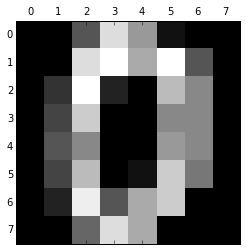

In [265]:
# digits.images[0] 그래프에 시각화
import pylab as pl
pl.matshow(digits.images[0]) 
pl.show() 


In [261]:
print 'Digit:', digits.target[0]
print digits.images[0]

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


create a feature vector for the image by reshaping its 8 x 8 matrix into a 64-dimensional vector:

In [266]:
print 'Feature vector:\n', digits.images[0].reshape(-1, 64)

Feature vector:
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


#### Extracting points of interest as features

In [207]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.exposure import equalize_hist

In [217]:
def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

In [269]:
mandrill = io.imread('test_img.jpg')

In [272]:
mandrill = equalize_hist(rgb2gray(mandrill))

In [281]:
corners = corner_peaks(corner_harris(mandrill), min_distance=10)

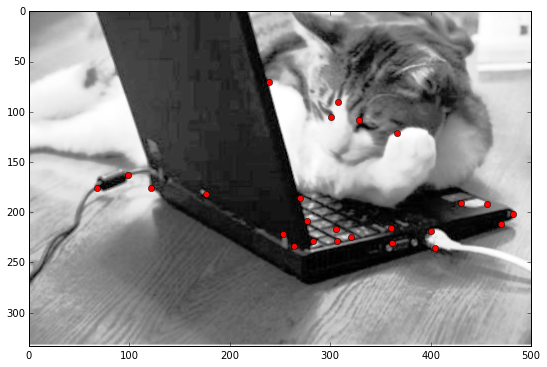

In [282]:
show_corners(corners, mandrill)

#### SIFT and SURF

In [283]:
import mahotas as mh
from mahotas.features import surf
image = mh.imread('test_img.jpg', as_grey=True)
print 'The first SURF descriptor:\n', surf.surf(image)[0]
print 'Extracted %s SURF descriptors' % len(surf.surf(image))
import numpy as np
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])

The first SURF descriptor:
[  2.27196086e+02   4.07421737e+02   4.39201028e+00   1.41085734e+03
  -1.00000000e+00   2.68581608e+00   1.54309084e-03   2.32795098e-03
   1.54309084e-03   2.32795098e-03   6.52103807e-03   1.34513620e-02
   7.10188076e-03   1.34513620e-02   9.44529178e-03   1.28432399e-02
   9.44529178e-03   1.28432399e-02   7.57499694e-04   9.22517434e-04
   1.16708006e-03   1.15417991e-03   3.14752523e-03   1.22539929e-02
   6.86719267e-03   1.22539929e-02  -2.20079391e-01   1.38937612e-02
   2.84843262e-01   7.82140690e-02  -1.45077621e-01   2.08699609e-01
   1.87692817e-01   2.15863520e-01   8.36510747e-04   4.92314366e-03
   6.64366047e-03   6.80813073e-03   8.49174783e-03   2.65391656e-02
   5.83626875e-02   3.15371149e-02   3.57454611e-01   1.23822929e-01
   3.83228327e-01   1.62797539e-01   2.48417933e-01   3.61213454e-01
   2.63505608e-01   3.64319957e-01   3.02655536e-03   4.17239750e-03
   3.57762929e-03   4.17239750e-03   3.41016608e-04   5.82642781e-04
   5.98

### Data standardization

In [230]:
from sklearn import preprocessing
import numpy as np
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])
print preprocessing.scale(X)

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]
